In [ ]:
import os
import numpy as np
import pandas as pd
import csv
import re

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

from google.colab import drive
drive.mount('/content/drive')
os.chdir("/content/drive/MyDrive/Data")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('data_with_labels_mini.csv', header = None, dtype = str, encoding = 'utf-8-sig', engine='python')
df.columns = ['date', 'id', 'text', 'hashtags', \
                        'state', 'county and city',\
                        'retweet_count', 'favorite_count',\
                        'text_id', 'st_labels', 'st_scores', 'aspects']

In [ ]:
txtfile = open('COVID19_AIDR_Keywords.txt')
lines = txtfile.readlines()
ids = []
for line in lines:
    line = line.split(',')
    for i in line:
        i = re.sub(r'[^a-zA-Z]', '', i)
        if i != '':
            i = i.lower()
            ids.append(i.strip())

In [ ]:
lst = []
for content in df["hashtags"]:
    if pd.isna(content) == False:
        content = content.lower()
        hg = content.split(',')
        hg_clean = [x.strip() for x in hg if x.strip() not in ids]
        lst.extend(hg_clean)
hg_all = pd.DataFrame(lst, columns=["hashtags"])
hg_counts = hg_all["hashtags"].value_counts()
result_clean = hg_counts.rename_axis('hashtags').reset_index(name='counts')
# result_clean.to_csv("hashtags.csv", mode='a', index=False, encoding = 'utf-8-sig')

Visualization

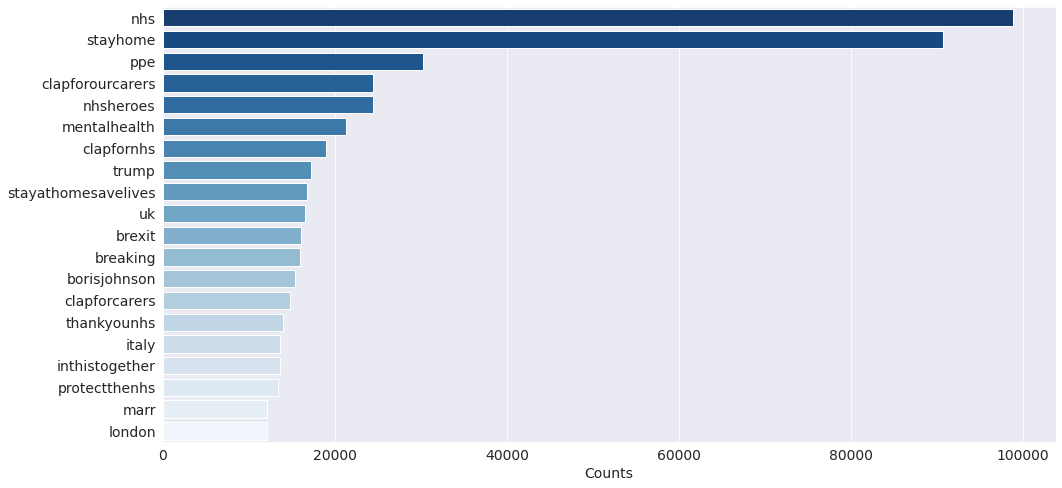

In [ ]:
# result_clean = pd.read_csv('hashtags.csv', dtype = str, encoding = 'utf-8-sig', engine='python')
plt.figure(figsize=(16, 8))
df1 = result_clean.iloc[:20, :].copy()
df1['counts'] = df1['counts'].apply(int)
x_data = list(df1.iloc[:, 1])
y_data = list(df1.iloc[:, 0])

sns.barplot(x=x_data, y=y_data, palette='Blues_r'); #'Blues_r' 'BuGn_r' 'Greens_r'  'Oranges_r'

plt.xlabel('Counts');